In [36]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
sklearn.__version__

'0.18.1'

In [37]:
# Load Iris Data Set
iris = load_iris()
X = iris.data
y = iris.target


In [38]:
# Create KNN Classifire object
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv = 10, scoring="accuracy")
# scores.mean()

In [54]:
k_range = range(1,31)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
    scores.append(score.mean())
# scores

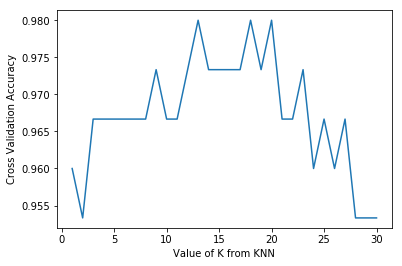

In [40]:
plt.plot(k_range, scores)
plt.xlabel("Value of K from KNN")
plt.ylabel("Cross Validation Accuracy")
plt.show()

In [41]:
knn = KNeighborsClassifier(n_neighbors=13)
scores = cross_val_score(knn, X, y, cv = 10, scoring="accuracy")
scores.mean()

0.98000000000000009

In [42]:
# Train the Model using KNN Classifier where K = 13 for the best accuracy(98%)
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [43]:
# Testing KNN Classifier prediction 
# Input X = [ 5.1,  3.5,  1.4,  0.2]
result = knn.predict([[ 5.1,  3.5,  1.4,  0.2]])
# output should be y = 0
result

array([0])

More Efficient Parameter Tuning Using GridSearchCV

In [44]:
from sklearn.grid_search import GridSearchCV

In [62]:
k_range = np.arange(1, 31)
param_grid = dict(n_neighbors=k_range)
param_grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)